# Retail Sales Forecasting using ARIMA

## Data Overview & Preprocessing

In [3]:
import pandas as pd

# Load dataset
file_path = r'C:\Users\nisfa\OneDrive\Desktop\retail(project)\new_retail_data.csv'
df = pd.read_csv(file_path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302010 entries, 0 to 302009
Data columns (total 30 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Transaction_ID    301677 non-null  float64
 1   Customer_ID       301702 non-null  float64
 2   Name              301628 non-null  object 
 3   Email             301663 non-null  object 
 4   Phone             301648 non-null  float64
 5   Address           301695 non-null  object 
 6   City              301762 non-null  object 
 7   State             301729 non-null  object 
 8   Zipcode           301670 non-null  float64
 9   Country           301739 non-null  object 
 10  Age               301837 non-null  float64
 11  Gender            301693 non-null  object 
 12  Income            301720 non-null  object 
 13  Customer_Segment  301795 non-null  object 
 14  Date              301651 non-null  object 
 15  Year              301660 non-null  float64
 16  Month             30

## Time Series Aggregation

In [2]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df.dropna(subset=['Date'])
sales_data = df.groupby('Date')['Total_Amount'].sum().reset_index()
sales_data.head()

,Date,Total_Amount
0,2023-03-01,1.104406e+06
1,2023-03-02,1.121526e+06
2,2023-03-03,1.097523e+06
3,2023-03-04,1.084541e+06
4,2023-03-05,1.156682e+06


## Stationarity Check using ADF Test

In [3]:
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(sales_data['Total_Amount'])
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')

ADF Statistic: -17.741739004861707
p-value: 3.3998129969084374e-30


## ARIMA Model Training & Forecasting

C:\Users\prade\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


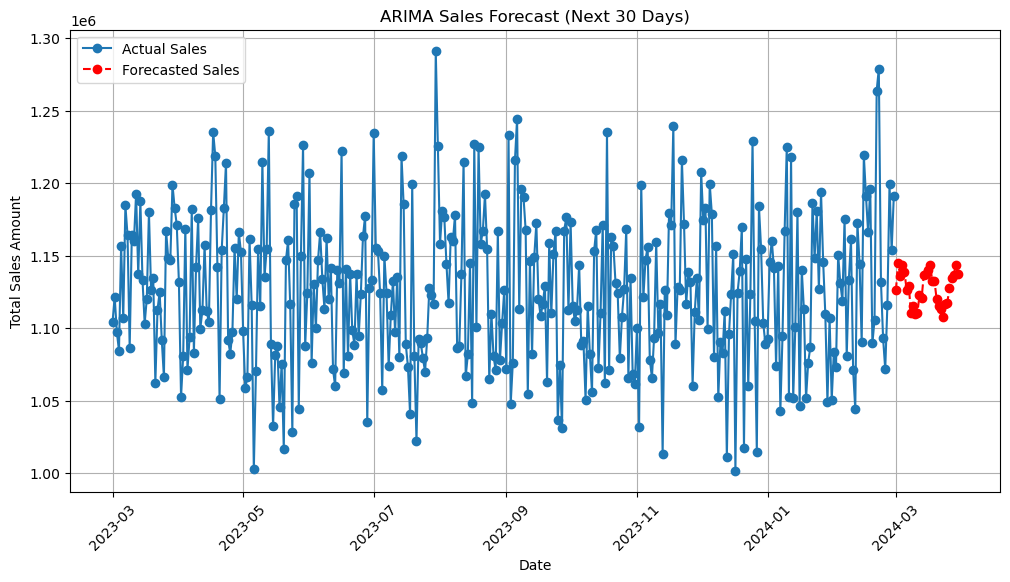

,Date,Forecasted_Sales
0,2024-03-01,1.126343e+06
1,2024-03-02,1.145020e+06
2,2024-03-03,1.135995e+06
3,2024-03-04,1.143583e+06
4,2024-03-05,1.138940e+06


In [4]:

from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Fit ARIMA model
model = ARIMA(sales_data['Total_Amount'], order=(5, 0, 5))
arima_result = model.fit()

# Forecast next 30 days
forecast_steps = 30
forecast = arima_result.forecast(steps=forecast_steps)

# Generate future dates
future_dates = pd.date_range(start=sales_data['Date'].iloc[-1] + pd.Timedelta(days=1), periods=forecast_steps)

# Create forecast dataframe
forecast_df = pd.DataFrame({'Date': future_dates, 'Forecasted_Sales': forecast.values})

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(sales_data['Date'], sales_data['Total_Amount'], label='Actual Sales', marker='o', linestyle='-')
plt.plot(forecast_df['Date'], forecast_df['Forecasted_Sales'], label='Forecasted Sales', marker='o', linestyle='--', color='red')
plt.xlabel("Date")
plt.ylabel("Total Sales Amount")
plt.title("ARIMA Sales Forecast (Next 30 Days)")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Save forecast results
forecast_df.to_csv("arima_retail_forecast.csv", index=False)
forecast_df.head()
